# Guided Capstone Step 3 Exploratory Data Analysis

With Data Wrangling out of the way, it's time to move into the Exploratory Data Analysis phase of this guided capstone. In this exercise, you'll learn to build data profiles and plots, including a relationship plot and a data correlation plot. You'll also implement k-means clustering, complete clusters, and update a dataframe as a CSV file. Let's get started! 
  
**The Data Science Method**  


1.   Problem Identification 

2.   Data Wrangling 
  * Data Collection 
   * Data Organization
  * Data Definition 
  * Data Cleaning
 
3.   **Exploratory Data Analysis** 
 * Build data profile tables and plots
        - Outliers & Anomalies
 * Explore data relationships
 * Identification and creation of features

4.   Pre-processing and Training Data Development
  * Create dummy or indicator features for categorical variables
  * Standardize the magnitude of numeric features
  * Split into testing and training datasets
  * Apply scaler to the testing set
5.   Modeling 
  * Fit Models with Training Data Set
  * Review Model Outcomes — Iterate over additional models as needed.
  * Identify the Final Model

6.   Documentation
  * Review the Results
  * Present and share your findings - storytelling
  * Finalize Code 
  * Finalize Documentation

**<font color='teal'> Start by loading the necessary packages as you did in step 2 of the guided capstone. Print out your current working directory to confirm you are in the correct project directory. </font>**

In [35]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np 
import seaborn as sns


In [36]:
pwd

'/Users/jeremysilva/Desktop/Springboard/Guided_Capstone/data'

In [37]:
cd data/

[Errno 2] No such file or directory: 'data/'
/Users/jeremysilva/Desktop/Springboard/Guided_Capstone/data


In [38]:
ls

histo.png            step2_output.csv
ski_data_kmeans.csv  step3_output.csv


**<font color='teal'> If you need to change your path, refer back to step 2 to review how to do this. Load the csv file you created in step 2. Remember, it should be saved inside your data subfolder. Print the first five rows.</font>**

In [39]:
ski_data= pd.read_csv('step2_output.csv', index_col=[0])
ski_data.head()

,Name,Region,state,summit_elev,vertical_drop,base_elev,trams,fastEight,fastSixes,fastQuads,...,LongestRun_mi,SkiableTerrain_ac,Snow Making_ac,daysOpenLastYear,yearsOpen,averageSnowfall,AdultWeekday,AdultWeekend,projectedDaysOpen,NightSkiing_ac
0,Alyeska Resort,Alaska,Alaska,3939,2500,250,1,0.0,0,2,...,1.0,1610.0,113.0,150.0,60.0,669.0,65.0,85.0,150.0,550.0
1,Eaglecrest Ski Area,Alaska,Alaska,2600,1540,1200,0,0.0,0,0,...,2.0,640.0,60.0,45.0,44.0,350.0,47.0,53.0,90.0,0.0
2,Hilltop Ski Area,Alaska,Alaska,2090,294,1796,0,0.0,0,0,...,1.0,30.0,30.0,150.0,36.0,69.0,30.0,34.0,152.0,30.0
3,Arizona Snowbowl,Arizona,Arizona,11500,2300,9200,0,0.0,1,0,...,2.0,777.0,104.0,122.0,81.0,260.0,89.0,89.0,122.0,0.0
4,Sunrise Park Resort,Arizona,Arizona,11100,1800,9200,0,0.0,0,1,...,1.2,800.0,80.0,115.0,49.0,250.0,74.0,78.0,104.0,80.0


# Build data profile tables and plots 

**<font color='teal'> Print out the summary stats table transposed to fit on the screen using the `describe()` function.</font>**

In [40]:
ski_data.describe().T

,count,mean,std,min,25%,50%,75%,max
summit_elev,330.0,4591.818182,3735.535934,315.0,1403.75,3127.500000,7806.000000,13487.0
vertical_drop,330.0,1215.427273,947.864557,60.0,461.25,964.500000,1800.000000,4425.0
base_elev,330.0,3374.000000,3117.121621,70.0,869.00,1561.500000,6325.250000,10800.0
trams,330.0,0.172727,0.559946,0.0,0.00,0.000000,0.000000,4.0
fastEight,330.0,0.003030,0.055048,0.0,0.00,0.000000,0.000000,1.0
fastSixes,330.0,0.184848,0.651685,0.0,0.00,0.000000,0.000000,6.0
fastQuads,330.0,1.018182,2.198294,0.0,0.00,0.000000,1.000000,15.0
quad,330.0,0.933333,1.312245,0.0,0.00,0.000000,1.000000,8.0
triple,330.0,1.500000,1.619130,0.0,0.00,1.000000,2.000000,8.0
double,330.0,1.833333,1.815028,0.0,1.00,1.000000,3.000000,14.0


**<font color='teal'> Histograms are an excellent way to review the range and density of values for each numeric feature in your dataset and to build data profiles. Plot the histograms for all numeric features and adjust the bins size to 25.</font>**

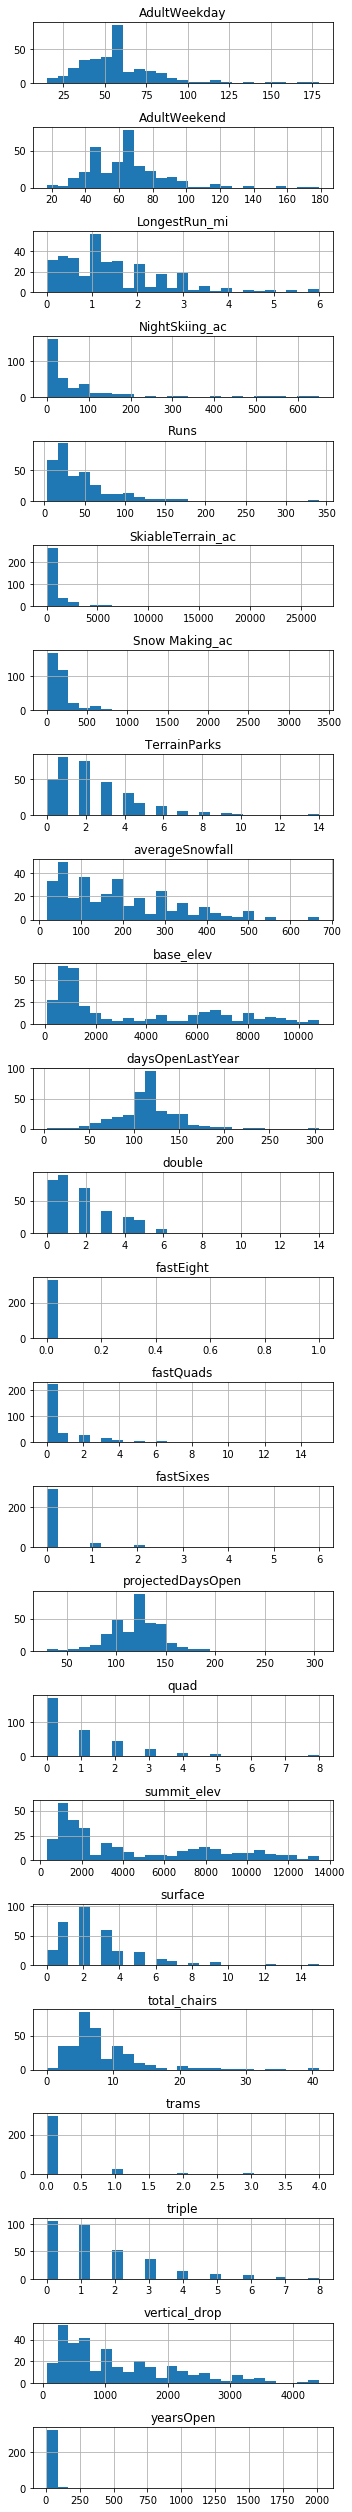

In [41]:
# Create list of all numeric data types
numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']
# Filter ski data by selecting only the numeric columsn
numeric_ski_data= ski_data.select_dtypes(include= numerics)
# Plot a histogram for each column in the numeric ski data
numeric_ski_data.hist(layout=(24, 1), bins=25, figsize=(5,35))
plt.tight_layout()
    

In [42]:
# daysopenlastyear and projecteddaysopen appear to have similair distributions
# averageSnowfall is more variable than I would expect
# snow Making_ac and SkiableTerrain_ac have somewhat similiar distributions
# AdultWeekday and AdultWeeekend are more variable than I would have thought

Look for similarities in the features that may indicate that they are duplicates or highly correlated features. Make a note of your findings and any other interesting insights you find about these numeric features.

**<font color='teal'> Okay, now you should be getting a sense for what the data looks like. Let's create a barplot for the categorical features `Region` and `State` where the heights of the bars are the counts of each level in that variable. </font>**

**<font color='teal'>State Levels Plot</font>**

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34]), <a list of 35 Text xticklabel objects>)

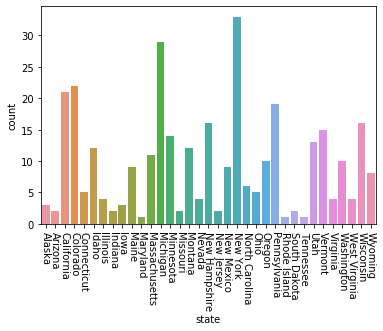

In [43]:
# Seaborn count plot for the state column 
sns.countplot(x='state', data=ski_data)
 
# Rotate x-labels to make them readable
plt.xticks(rotation=-90)

**<font color='teal'>Region Levels Plot</font>**

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37]), <a list of 38 Text xticklabel objects>)

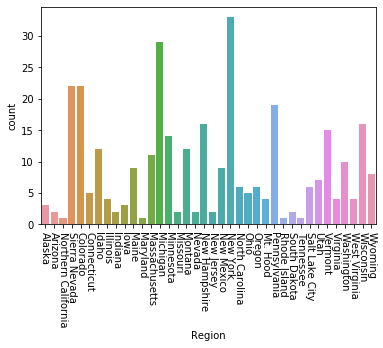

In [44]:
# Seaborn count plot for the Region column 
sns.countplot(x='Region', data=ski_data)
 
# Rotate x-labels to make them readable
plt.xticks(rotation=-90)

By reviewing the State and Region count plots, you should notice that the Region feature is nearly identical to the State feature and therfore you can remove the Region column from the dataframe.**<font color='teal'> Remove the `Region` column using the drop function.</font>**

In [45]:
# Remove the Region column from ski_data
ski_data= ski_data.drop(columns='Region')
# Check to make sure the Region column is gone
ski_data.head()

,Name,state,summit_elev,vertical_drop,base_elev,trams,fastEight,fastSixes,fastQuads,quad,...,LongestRun_mi,SkiableTerrain_ac,Snow Making_ac,daysOpenLastYear,yearsOpen,averageSnowfall,AdultWeekday,AdultWeekend,projectedDaysOpen,NightSkiing_ac
0,Alyeska Resort,Alaska,3939,2500,250,1,0.0,0,2,2,...,1.0,1610.0,113.0,150.0,60.0,669.0,65.0,85.0,150.0,550.0
1,Eaglecrest Ski Area,Alaska,2600,1540,1200,0,0.0,0,0,0,...,2.0,640.0,60.0,45.0,44.0,350.0,47.0,53.0,90.0,0.0
2,Hilltop Ski Area,Alaska,2090,294,1796,0,0.0,0,0,0,...,1.0,30.0,30.0,150.0,36.0,69.0,30.0,34.0,152.0,30.0
3,Arizona Snowbowl,Arizona,11500,2300,9200,0,0.0,1,0,2,...,2.0,777.0,104.0,122.0,81.0,260.0,89.0,89.0,122.0,0.0
4,Sunrise Park Resort,Arizona,11100,1800,9200,0,0.0,0,1,2,...,1.2,800.0,80.0,115.0,49.0,250.0,74.0,78.0,104.0,80.0


## Anamolies & outliers - review boxplots

**<font color='teal'> Print a boxplot for every column</font>**

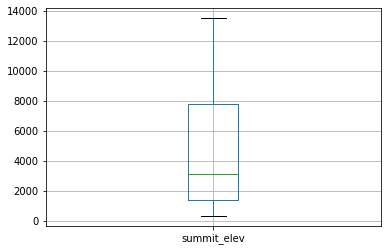

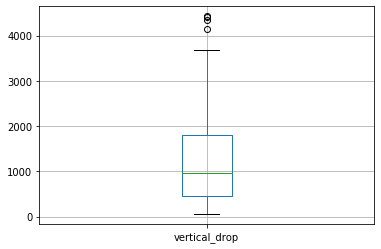

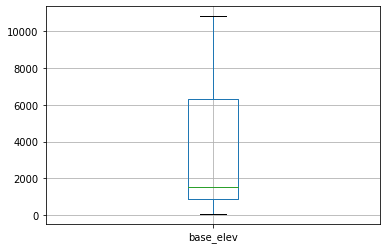

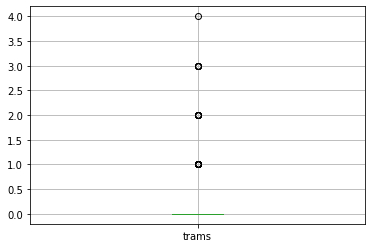

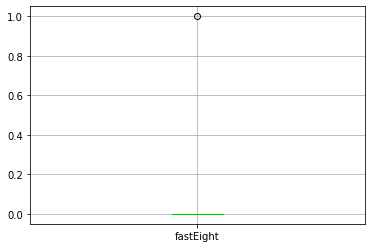

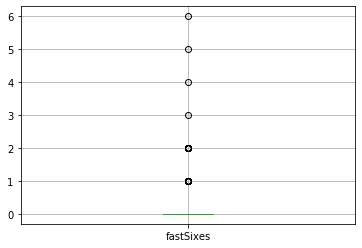

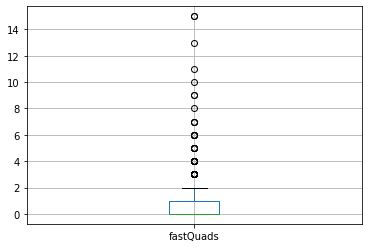

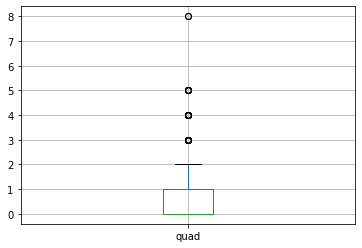

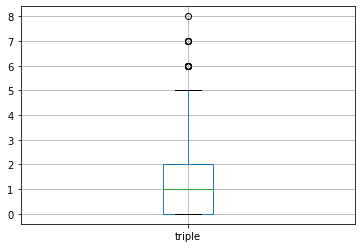

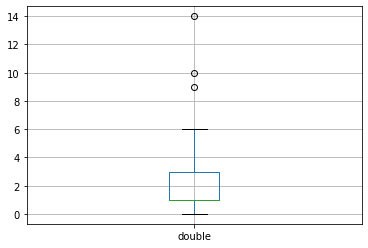

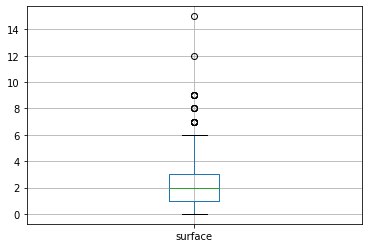

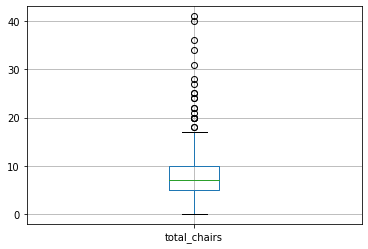

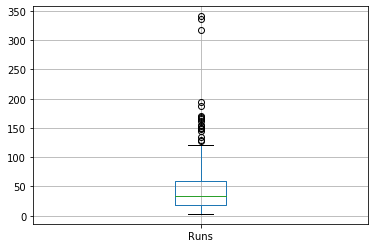

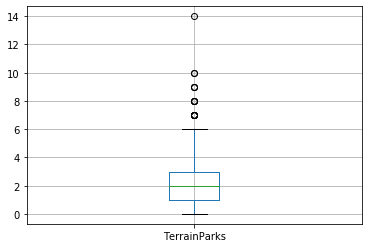

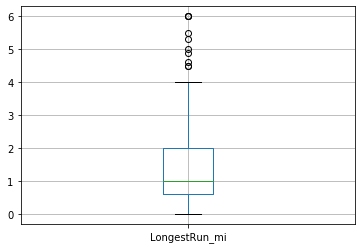

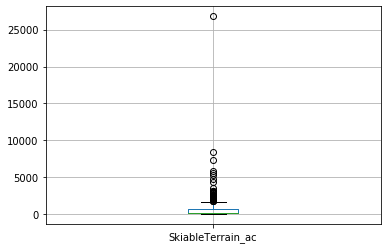

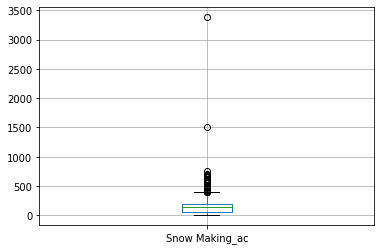

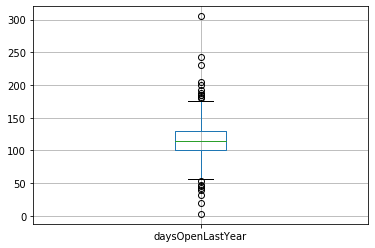

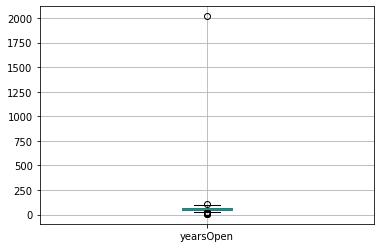

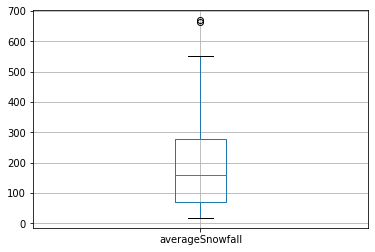

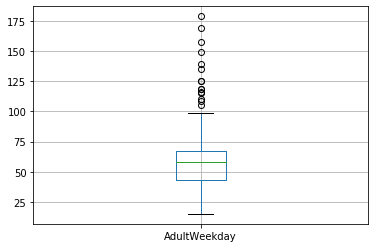

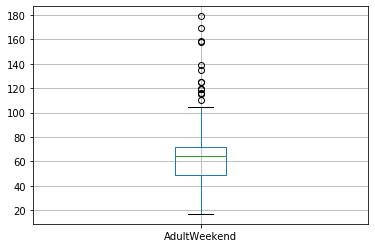

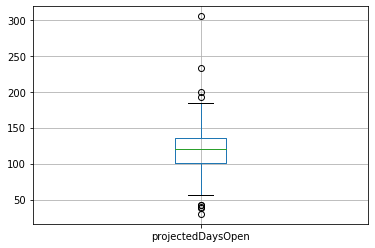

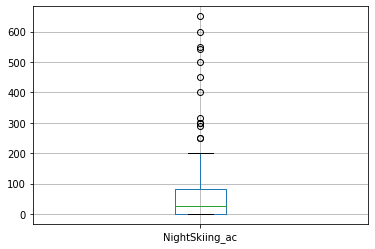

In [46]:
### I am assuming I should only be working with the numeric columns for this section but I am not sure if 
### that assumption is correct or not 
# Goal is to print a box plot for each numeric variable in the ski data
# create a list that holds all the numeric columns names
numeric_cols= list(numeric_ski_data.columns)
# Iterate over that list printing out a boxplot for each column
for col in numeric_cols:
    numeric_ski_data.boxplot(column=col)
    plt.show()

You need to create boxplots and  histograms to evaluate the data for potential outliers or data anomalies. Generally, outliers are defined as observations that differ significantly from the other values in the dataset or feature. 

Reviewing the distribution of values by column will help you  interpret this. Outliers are extreme values that fall far outside the mean and standard deviation of a set of observations. They  can mislead the training process in building machine learning models. Outliers may be real anomalies in the observations, or artificial errors. 

One method for outlier analysis is extreme value analysis using a boxplot, which assumes a normal distribution. The figure below describes the components of a boxplot. Notice the outlier is the point outside the upper whisker end. 

![](AnnotatedBoxplot.png)  
<font color='teal'>**Follow these steps:  

1. Create boxplots - earlier step
2. Apply outlier removal using the Interquartile range or replacement 
3. Review how many observations were removed**</font>

In [47]:
# Check shape of initial dataframe
ski_data.shape

(330, 26)

In [48]:
# Goal is to see how many values lie beyond 2 std dev from the mean for each column without altering the original dataset
# Make a copy of the dataset to work off so we retain to original dataset
ski_data_outliers= ski_data.copy()
# Start by finding the median for each column
median = ski_data_outliers.median()
# Then find the std for each column
std = ski_data_outliers.std()
# Set outlier to anywhere that the value is more than 2 std away from the mean for all columns except first 2
outliers = (ski_data_outliers.iloc[:,2:] - median).abs() > 2 * std
# Replace all the outliers with NaN 
ski_data_outliers[outliers] = np.nan
# Display the number of outliers in each column by subtracting the number of non-null observations from the number of total observations
len(ski_data_outliers) - ski_data_outliers.count()


Name                  0
state                 0
summit_elev          30
vertical_drop        25
base_elev            45
trams                13
fastEight             1
fastSixes            15
fastQuads            21
quad                 38
triple               21
double               30
surface              18
total_chairs         18
Runs                 19
TerrainParks         16
LongestRun_mi        22
SkiableTerrain_ac     8
Snow Making_ac       14
daysOpenLastYear     18
yearsOpen             1
averageSnowfall      21
AdultWeekday         14
AdultWeekend         15
projectedDaysOpen    19
NightSkiing_ac       13
dtype: int64

There are many possible response variables you could have identified during Step 1 of the guided capstone. However, for the rest of this guided capstone project, you will focus on increasing revenue by increasing the lift ticket prices and the number of days the resort is open per year. In this case, you need to investigate the expected lift ticket price for Big Mountain based on all the other given resort characteristics. In addition, you'll want to predict the number of days the mountain is open each season.

<font color='teal'>**Review the `AdultWeekday`,`AdultWeekend` response variable distributions**</font>

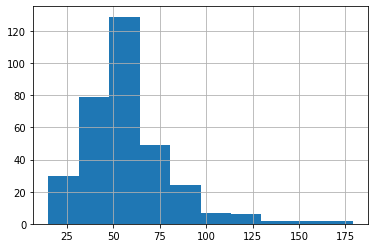

In [49]:
ski_data['AdultWeekday'].hist()

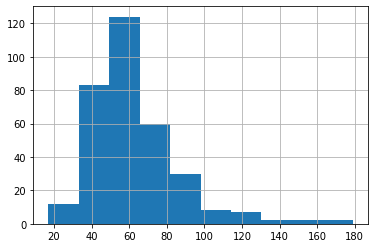

In [50]:
ski_data['AdultWeekend'].hist()

<font color='teal'>**Review the `daysOpenLastYear`,`projecteDaysOpen` response variable distributions**</font>

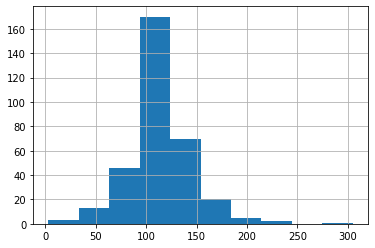

In [51]:
ski_data['daysOpenLastYear'].hist()

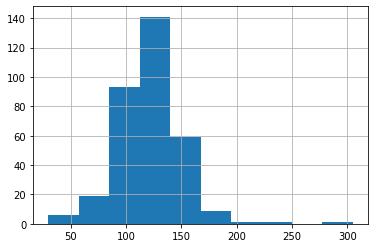

In [52]:
ski_data['projectedDaysOpen'].hist()

After reviewing these response varible distributions, there doesn't appear to be any data issues to mitigate. Now, you'll move on to investigating feature relationships and interactions between the features and the response.

# Explore data relationships

<font color='teal'>**Create pairplots, or what is commonly referred to as biplots**</font>

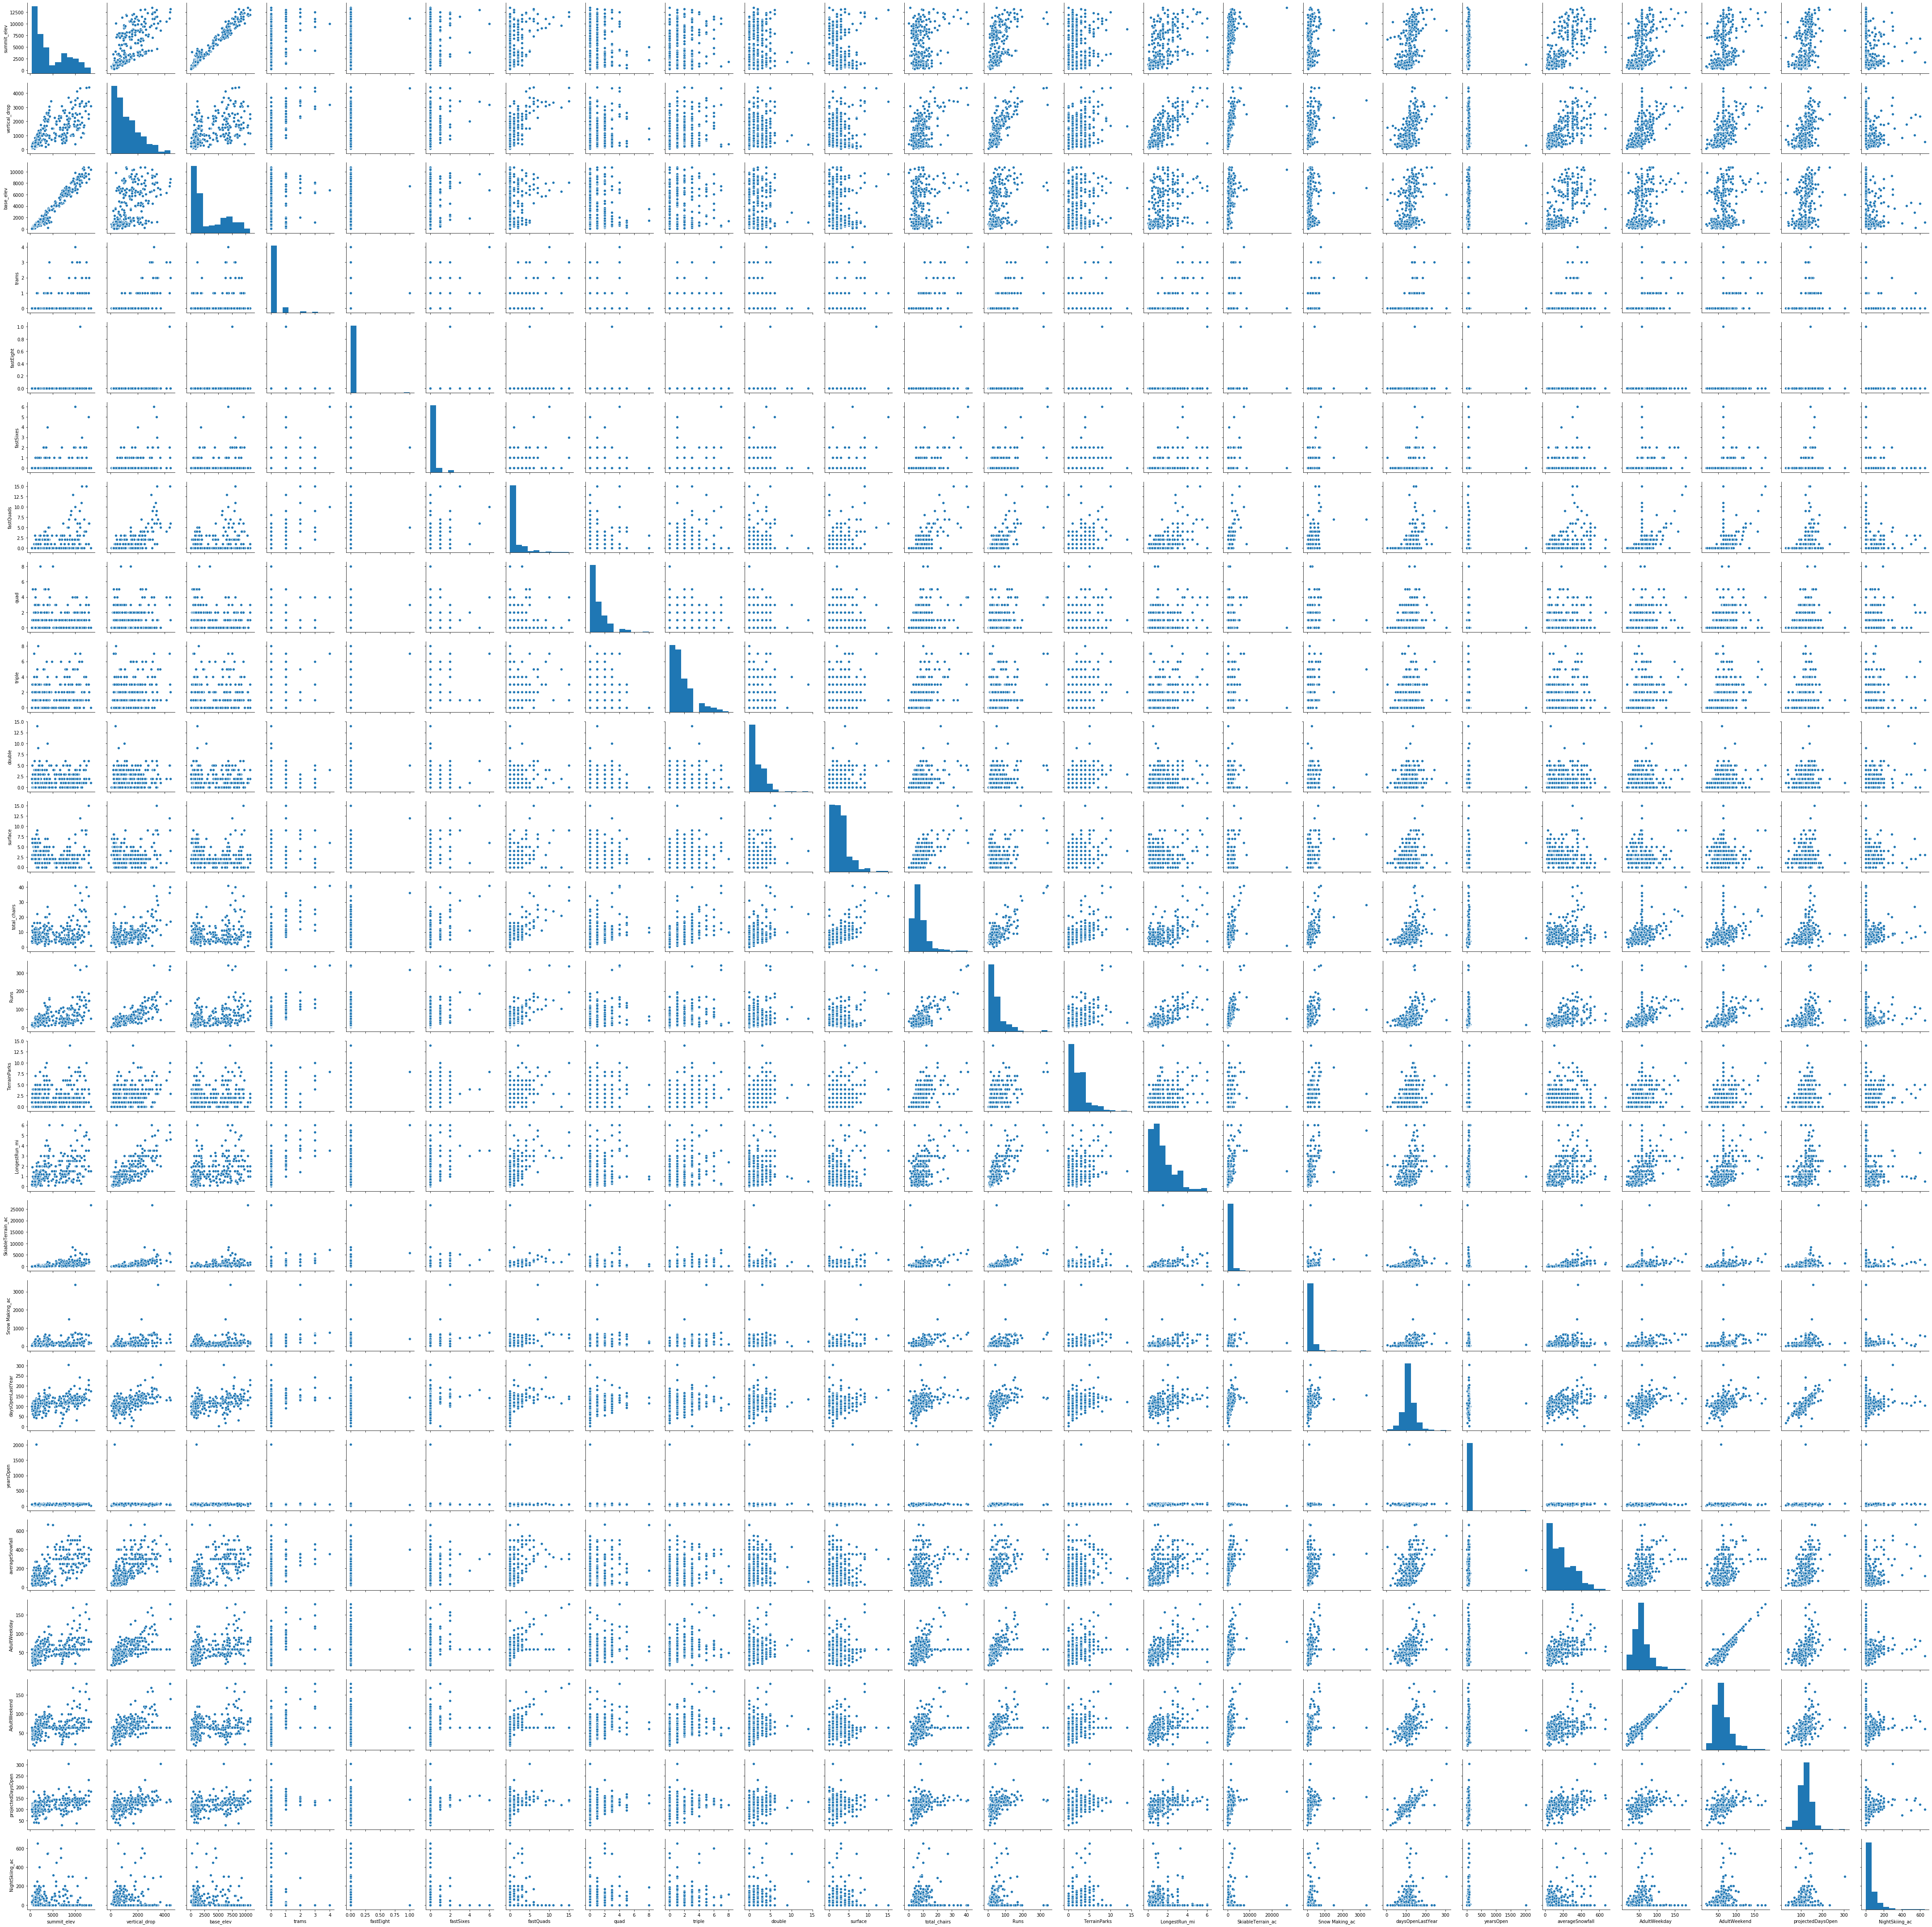

In [53]:
### Should I be using the data w/ outliers removed??
# I am going to use the data without the outliers removed
sns.pairplot(ski_data)

# Identification and creation of features

<font color='teal'>**Create a Pearson correlation heatmap**</font>

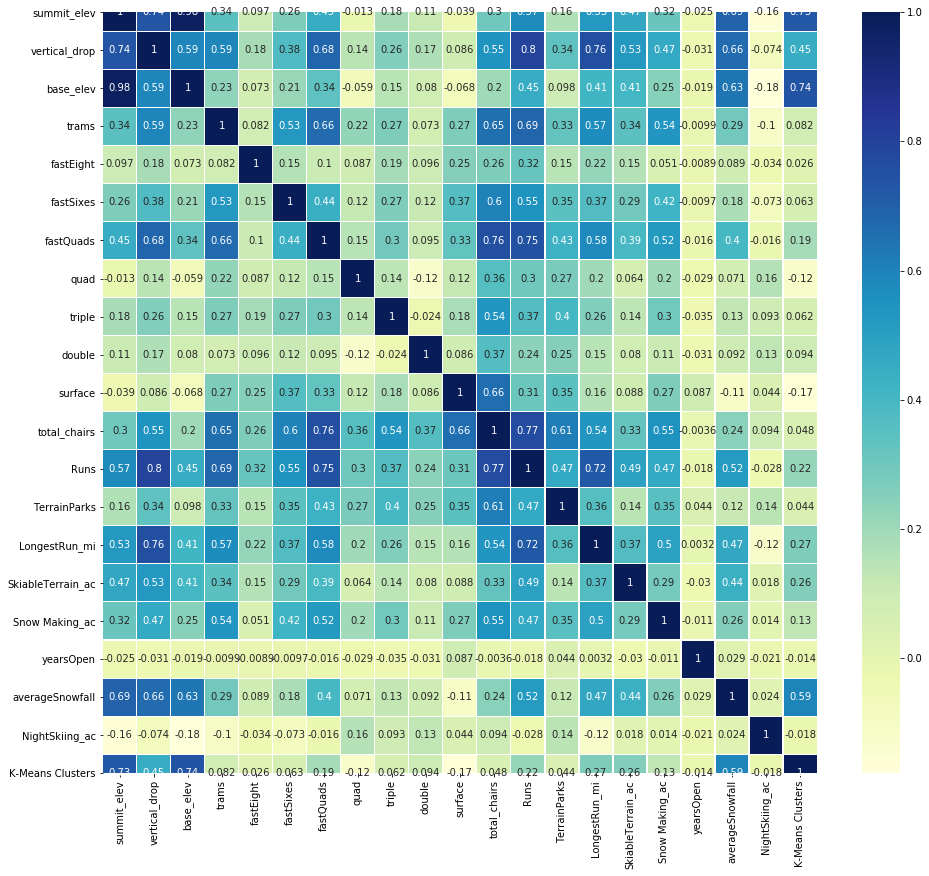

In [65]:
# Remove the response variables from the correlation matrix
# Create df without response variables
ski_data_no_response= ski_data.drop(columns=['AdultWeekend', 'AdultWeekday', 'daysOpenLastYear', 'projectedDaysOpen'])
#create the correlation matrix heat map from the df without the reponse varaibles
plt.figure(figsize=(16,14))
sns.heatmap(ski_data_no_response.corr(),linewidths=.09,cmap="YlGnBu", annot=True)
plt.yticks(rotation=0);
plt.savefig('corr_heatmap.png')


When reviewing the Pearson correlation coefficient heat map, you can see substantial differences in the correlations compared to the response variable(s) as well as in the features when compared to each other. The heatmap helps identify features that suffer from Multi-collinearity. 

<font color='teal'>**Use the correlation matrix displayed in the heatmap to select and remove collinear features. Remember to exclude the response variable(s) from the matrix to ensure they are retained in your final model development dataset. Then select those features that are more than 95% correlated for removal.**</font>

In [67]:
### I see that base_elev and summit_elev have a strong corr but in the next notebook it has us working with those
### so I am going to keep those for now 

Now you'll address the feature creation piece of this step. You can create additional features through many methods, such as: combining several features, grouping features into bins, or even by applying an unsupervised classification algorithm, such as k-means clustering and using the clusters as features in your model development dataset.

Run the next two cells below to create an Elbow plot. The Elbow plot is a diagnostic tool that helps you determine the number of clusters to include in your k-means clustering implementation. In this example, the error between clusters and within clusters is compared for a range of 1 to 11 clusters, and it appears the elbow is between two and four, therefore we set the parameter k = 3.

In [68]:
from sklearn.cluster import KMeans
X = ski_data.drop(['Name','state'], axis =1).values

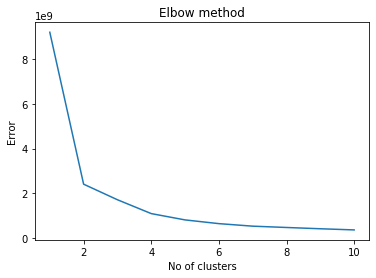

In [69]:
Error =[]
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i).fit(X)
    kmeans.fit(X)
    Error.append(kmeans.inertia_)

plt.plot(range(1, 11), Error)
plt.title('Elbow method')
plt.xlabel('No of clusters')
plt.ylabel('Error')
plt.show()

<font color='teal'>**Fit the k-means algorithm with the k parameter set to three and plot the results.**</font>

In [70]:
### I think this is right but i could use some validation 
# Link I used as direction: https://medium.com/pursuitnotes/k-means-clustering-model-in-6-steps-with-python-35b532cfa8ad
#According to the Elbow graph we deterrmine the clusters number as 3. Applying k-means algorithm to the X dataset with 3 clusters.
kmeans = KMeans(n_clusters=3, init ='k-means++', max_iter=300, n_init=10,random_state=0 )
# We are going to use the fit predict method that returns for each 
#observation which cluster it belongs to. The cluster to which 
#client belongs and it will return this cluster numbers into a 
#single vector that is  called y K-means
y_kmeans = kmeans.fit_predict(X)
y_kmeans

array([0, 0, 0, 1, 1, 2, 2, 2, 2, 2, 2, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 0, 0, 0, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2,
       1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 2,
       2, 2, 0, 0, 0, 0, 0, 2, 0, 2, 2, 1, 2, 2, 2, 2, 2, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 0, 1, 2, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 2, 2, 2, 2, 2, 2, 2, 2, 0,

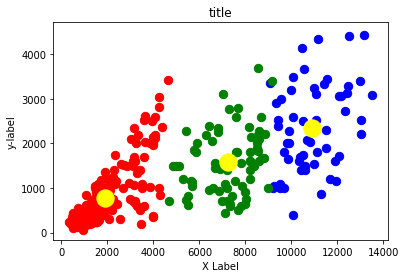

In [71]:
### Redo this visua;ization
### All these points are in a 15 dim space 
### Use PCA would be the best way to appraoch this but don't have to do this right now 
###
#6 Visualising the clusters
plt.scatter(X[y_kmeans==0, 0], X[y_kmeans==0, 1], s=70, c='red', label ='Cluster 1')
plt.scatter(X[y_kmeans==1, 0], X[y_kmeans==1, 1], s=70, c='blue', label ='Cluster 2')
plt.scatter(X[y_kmeans==2, 0], X[y_kmeans==2, 1], s=70, c='green', label ='Cluster 3')

#Plot the centroid. This time we're going to use the cluster centres  
#attribute that returns here the coordinates of the centroid.
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=300, c='yellow', label = 'Centroids')
plt.title('title')
plt.xlabel('X Label')
plt.ylabel('y-label')
plt.show()

<font color='teal'>**Add the clusters to your dataframe as a new column to include in the next step of the guided capstone and write the updated dataframe out as csv. Save the dataframe in the data folder and name it `step3_output.csv`.**</font>

In [72]:
# Adding the k-means clusters to the ski_data dataframe 
ski_data['K-Means Clusters']= y_kmeans
# Check to make sure the k-means cluster column is there and everything else looks good
ski_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 330 entries, 0 to 329
Data columns (total 27 columns):
Name                 330 non-null object
state                330 non-null object
summit_elev          330 non-null int64
vertical_drop        330 non-null int64
base_elev            330 non-null int64
trams                330 non-null int64
fastEight            330 non-null float64
fastSixes            330 non-null int64
fastQuads            330 non-null int64
quad                 330 non-null int64
triple               330 non-null int64
double               330 non-null int64
surface              330 non-null int64
total_chairs         330 non-null int64
Runs                 330 non-null float64
TerrainParks         330 non-null float64
LongestRun_mi        330 non-null float64
SkiableTerrain_ac    330 non-null float64
Snow Making_ac       330 non-null float64
daysOpenLastYear     330 non-null float64
yearsOpen            330 non-null float64
averageSnowfall      330 non-null flo

In [73]:
# Saving the 
ski_data.to_csv('step3_output.csv')